In [2]:
import numpy as np
import cvxpy as cp
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.special import gamma
import itertools
import time
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import pandas as pd

In [3]:
def plot_eval_all(df, quantiles, df1=None, quantiles1=None,end_ind=61,j=(0,0,0), q = (40,60),K=5, alpha=0.1,ylim = [0.008,0.022], legend = True,val2 = 3):
    j1,j4,j3 = j
    # Set up LaTeX rendering
    df = df[K].copy()
    fontsize= 10
    # df = df[K]
    # df = quantiles[K][50].copy()
    # df1 = quantiles[0][50].copy()
    quantiles = quantiles[K].copy()
    q1,q2 = q
    # plt.rcParams.update({
    #     "text.usetex": True,
    #     "font.family": "serif",
    #     "font.serif": ["Computer Modern Roman"],
    #     "font.size": 10,
    #     "axes.labelsize": 10,
    #     "axes.titlesize": 11,
    #     "legend.fontsize": 11
    # })
    t_range = np.array(df['t'])[(0*end_ind):(1)*end_ind:2]
    fig, (ax2,ax3,ax1) = plt.subplots(1, 3, figsize=(9, val2), dpi=300)
    
    # # online and reclustering
    # ax1.plot(t_range, df['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)

    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')
    # ax1.plot(t_range, df['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2], 'r-', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    # # DRO and SAA
    # ax1.plot(t_range, df1['SA_eval1'][(j3*end_ind):(j3+1)*end_ind-1:2], 'g-', linewidth=1, label = "SAA", marker="o",ms=1.5)
    # ax1.plot(t_range, df1['DRO_eval1'][(j3*end_ind):(j3+1)*end_ind-1:2], color ='black', linewidth=1, label = "DRO", marker="s",ms=1.5)
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='g')
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='black')

    # ax1.set_ylim(ylim)
    # # plt.legend()
    # ax1.set_xlabel(r'Time step $(t)$')
    # ax1.set_title(r'Out-of-sample expected value')
    # ax1.grid(True, alpha=0.3)

    ax1.plot(t_range, df['online_time'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)
    
    # ax1.plot(t_range, np.array(df['MRO_time'][(j2*end_ind):(j2+1)*end_ind:2])+np.array(df['MRO_worst_times'][(j1*end_ind):(j1+1)*end_ind:2]), 'r-', linewidth=1, label = "reclustering",marker="D",ms=1.5)

    ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['online_time'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['online_time'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')
    
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color = 'r')

    # reclustering worst
    ax1.plot(t_range, df['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2], 'r', linewidth=1, label = r"reclustering", marker="D",ms=1.5)
    
    # ax1.plot(t_range, quantiles[50]['MRO_time'][(j4*end_ind)+1:(j4+1)*end_ind:2], 'r:', linewidth=1, label = r"reclustering $\hat{H}^K_t$", marker="^",ms=1.5)
    
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color = 'r')
    
    # DRO and SAA
    ax1.plot(t_range, df1['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO",marker="s",ms=1.5)
    ax1.plot(t_range, df1['SA_time'][(j3*end_ind):(j3+1)*end_ind:2], color ='g', linewidth=1, label = "SAA",marker="o",ms=1.5)
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'black')
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'g')

    ax1.set_xlabel(r'Time step $(t)$')
    # ax1.set_xscale("log")
    ax1.set_title(r'Computation time per iteration (s)')
    ax1.grid(True, alpha=0.3)
    # ax1.set_ylim([1e-4,1e3])
    ax1.set_yscale("log")


    # online and reclustering
    lines1, = ax2.plot(t_range, df['obj_values'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['obj_values'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['obj_values'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')

    lines2, = ax2.plot(t_range, np.array(df['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2]), 'r', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    # reclustering worst
    # ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')
    # lines5, = ax2.plot(t_range, df['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = r"reclustering $\hat{H}^K_t$", marker="^",ms=1.5)

    # DRO and SAA
    lines3, = ax2.plot(t_range, df1['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2], 'g-', linewidth=1, label = "SAA", marker="o",ms=1.5)
    lines4, = ax2.plot(t_range, df1['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO", marker="s",ms=1.5)
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'black')
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'g')

    ax2.set_xlabel(r'Time step $(t)$')
    # ax2.set_xscale("log")
    ax2.set_title(r'In-sample objective value')
    ax2.set_ylim(ylim)
    ax2.grid(True, alpha=0.3)

    # online and reclustering
    ax3.plot(t_range, df['O_satisfy0'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)

    ax3.plot(t_range, df['MRO_satisfy0'][(j4*end_ind):(j4+1)*end_ind:2], 'r',linestyle='-', linewidth=1, label = "reclustering",marker="D",ms=1.5)
    # reclustering worst
    # ax3.plot(t_range, df['MRO_worst_satisfy1'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = r"reclustering $\hat{H}^K_t$",marker="^",ms=1.5)
    # DRO and SAA
    ax3.plot(t_range, df1['SA_satisfy1'][(j3*end_ind):(j3+1)*end_ind:2], 'g-', linewidth=1, label = "SAA",marker="o",ms=1.5)
    ax3.plot(t_range, df1['DRO_satisfy1'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO",marker="s",ms=1.5)
    ax3.set_xlabel(r'Time step $(t)$')
    # ax3.set_xscale("log")

    ax3.set_title(r'Confidence $1-\hat{\beta}_t$')
    ax3.grid(True, alpha=0.3)
    
    # Create a shared legend beneath the plots
    lines = [lines1,lines2, lines3, lines4]
    labels = [line.get_label() for line in lines]
    if legend:
        legend = fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=5)
    plt.tight_layout()
    # fig.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to fit the legend
    plt.savefig('obj_analysis'+str(K)+'.pdf', bbox_inches='tight', dpi=300)


In [4]:
def plot_certificates(df, quantiles, df1=None, quantiles1=None,end_ind=61,j=(0,0,0), q = (40,60),K=5, alpha=0.1,ylim = [0.008,0.022], legend = True,val2 = 3):
    j1,j4,j3 = j
    # Set up LaTeX rendering
    df = df[K].copy()
    fontsize= 10
    # df = df[K]
    # df = quantiles[K][50].copy()
    # df1 = quantiles[0][50].copy()
    quantiles = quantiles[K].copy()
    q1,q2 = q
    # plt.rcParams.update({
    #     "text.usetex": True,
    #     "font.family": "serif",
    #     "font.serif": ["Computer Modern Roman"],
    #     "font.size": 10,
    #     "axes.labelsize": 10,
    #     "axes.titlesize": 11,
    #     "legend.fontsize": 11
    # })
    t_range = np.array(df['t'])[(0*end_ind):(1)*end_ind:2]
    fig, (ax2,ax3,ax1) = plt.subplots(1, 3, figsize=(9, val2), dpi=300)
    
    # # online and reclustering
    # ax1.plot(t_range, df['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)

    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['O_eval0'][(j1*end_ind)+1:(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')
    # ax1.plot(t_range, df['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2], 'r-', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_eval0'][(j2*end_ind)+1:(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    # # DRO and SAA
    # ax1.plot(t_range, df1['SA_eval1'][(j3*end_ind):(j3+1)*end_ind-1:2], 'g-', linewidth=1, label = "SAA", marker="o",ms=1.5)
    # ax1.plot(t_range, df1['DRO_eval1'][(j3*end_ind):(j3+1)*end_ind-1:2], color ='black', linewidth=1, label = "DRO", marker="s",ms=1.5)
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='g')
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_eval1'][(j3*end_ind)+1:(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='black')

    # ax1.set_ylim(ylim)
    # # plt.legend()
    # ax1.set_xlabel(r'Time step $(t)$')
    # ax1.set_title(r'Out-of-sample expected value')
    # ax1.grid(True, alpha=0.3)

    ax1.plot(t_range, df['online_time'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)
    
    # ax1.plot(t_range, np.array(df['MRO_time'][(j2*end_ind):(j2+1)*end_ind:2])+np.array(df['MRO_worst_times'][(j1*end_ind):(j1+1)*end_ind:2]), 'r-', linewidth=1, label = "reclustering",marker="D",ms=1.5)

    ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['online_time'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['online_time'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')
    
    # ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color = 'r')

    # reclustering worst
    ax1.plot(t_range, df['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2], 'r', linewidth=1, label = r"reclustering", marker="D",ms=1.5)
    
    # ax1.plot(t_range, quantiles[50]['MRO_time'][(j4*end_ind)+1:(j4+1)*end_ind:2], 'r:', linewidth=1, label = r"reclustering $\hat{H}^K_t$", marker="^",ms=1.5)
    
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_time'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color = 'r')
    
    # DRO and SAA
    ax1.plot(t_range, df1['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO",marker="s",ms=1.5)
    ax1.plot(t_range, df1['SA_time'][(j3*end_ind):(j3+1)*end_ind:2], color ='g', linewidth=1, label = "SAA",marker="o",ms=1.5)
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'black')
    ax1.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_time'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'g')

    ax1.set_xlabel(r'Time step $(t)$')
    # ax1.set_xscale("log")
    ax1.set_title(r'Computation time per iteration (s)')
    ax1.grid(True, alpha=0.3)
    # ax1.set_ylim([1e-4,1e3])
    ax1.set_yscale("log")


    # online and reclustering
    lines1, = ax2.plot(t_range, np.array(df['obj_values'][(j1*end_ind):(j1+1)*end_ind:2])+5*np.array(df['sig_val'][(j1*end_ind):(j1+1)*end_ind:2]), 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)
    
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['obj_values'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float)+5*np.array(quantiles[q1]['sig_val'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['obj_values'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float)+5*np.array(quantiles[q2]['sig_val'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')

    lines2, = ax2.plot(t_range, np.array(df['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2])+5*np.array(df['MRO_sig_val'][(j4*end_ind):(j4+1)*end_ind:2]), 'r', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float)+5*np.array(quantiles[q1]['MRO_sig_val'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_obj_values'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float)+5*np.array(quantiles[q2]['MRO_sig_val'][(j4*end_ind):(j4+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    # reclustering worst
    # ax2.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')
    # lines5, = ax2.plot(t_range, df['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = r"reclustering $\hat{H}^K_t$", marker="^",ms=1.5)

    # DRO and SAA
    lines3, = ax2.plot(t_range, df1['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2], 'g-', linewidth=1, label = "SAA", marker="o",ms=1.5)
    lines4, = ax2.plot(t_range, df1['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO", marker="s",ms=1.5)
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'black')
    ax2.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'g')

    ax2.set_xlabel(r'Time step $(t)$')
    # ax2.set_xscale("log")
    ax2.set_title(r'Certificate')
    ax2.set_ylim(ylim)
    ax2.grid(True, alpha=0.3)

    # online and reclustering
    ax3.plot(t_range, df['O_worst_satisfy0'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)

    ax3.plot(t_range, df['MRO_worst_satisfy0'][(j4*end_ind):(j4+1)*end_ind:2], 'r',linestyle='-', linewidth=1, label = "reclustering",marker="D",ms=1.5)
    # reclustering worst
    # ax3.plot(t_range, df['MRO_worst_satisfy1'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = r"reclustering $\hat{H}^K_t$",marker="^",ms=1.5)
    # DRO and SAA
    ax3.plot(t_range, df1['SA_satisfy1'][(j3*end_ind):(j3+1)*end_ind:2], 'g-', linewidth=1, label = "SAA",marker="o",ms=1.5)
    ax3.plot(t_range, df1['DRO_satisfy1'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = "DRO",marker="s",ms=1.5)
    ax3.set_xlabel(r'Time step $(t)$')
    # ax3.set_xscale("log")

    ax3.set_title(r'Confidence $1-\hat{\beta}_t$')
    ax3.grid(True, alpha=0.3)
    
    # Create a shared legend beneath the plots
    lines = [lines1,lines2, lines3, lines4]
    labels = [line.get_label() for line in lines]
    if legend:
        legend = fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=5)
    plt.tight_layout()
    # fig.subplots_adjust(bottom=0.05)  # Adjust the bottom margin to fit the legend
    plt.savefig('obj_analysis'+str(K)+'.pdf', bbox_inches='tight', dpi=300)


In [166]:
def plot_eval(df, quantiles, df1=None, quantiles1=None,end_ind=61,j=(0,0,0), q = (40,60),K=5, alpha=0.1,legend = True):
    j1,j2,j3 = j
    # Set up LaTeX rendering
    df = df[K]
    fontsize= 10
    quantiles = quantiles[K]
    q1,q2 = q
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": fontsize,
        "axes.labelsize": fontsize,
        "axes.titlesize": 11,
        "legend.fontsize": fontsize
    })
    t_range = np.array(df['t'])[(0*end_ind):(1)*end_ind:2] +1
    plt.figure(figsize=(4.3, 2.1), dpi=300)
    plt.plot(t_range, df['O_eval0'][(j1*end_ind):(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering" , marker="v",ms=1.5)

    plt.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['O_eval0'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['O_eval0'][(j1*end_ind):(j1+1)*end_ind:2]).astype(float),alpha=alpha, color = 'b')
    plt.plot(t_range, df['MRO_eval0'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_eval0'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_eval0'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    plt.plot(t_range, df1['DRO_eval1'][(j3*end_ind):(j3+1)*end_ind:2], 'black', linewidth=1, label = "DRO", marker="s",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_eval1'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_eval1'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='black')

    plt.plot(t_range, df1['SA_eval1'][(j3*end_ind):(j3+1)*end_ind:2], 'g-', linewidth=1, label = "SAA", marker="o",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['SA_eval1'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['SA_eval1'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color='g')
    plt.xscale("log")
    # plt.ylim([0.008,0.022])
    if legend:
        plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.title(f'Out-of-sample expected value, $K$ = {K}')
    plt.grid(True, alpha=alpha)
    plt.savefig('eval_analysis.pdf', bbox_inches='tight', dpi=300)

In [6]:
def plot_satisfy(df, df1=None,end_ind=61,j=(0,0,0),K=5):
    # Set up LaTeX rendering
    j1,j2,j3 = j
    df = df[K]
    # df = quantiles[K][50].copy()
    # df1 = quantiles[0][50].copy()
    quantiles = quantiles[K].copy()
    fontsize= 10
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": fontsize,
        "axes.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.fontsize": 8
    })
    t_range = df['t'][(0*end_ind)+1:(1)*end_ind:2]
    plt.figure(figsize=(4, 2), dpi=300)

    # online and reclustering
    plt.plot(t_range, df['O_satisfy1'][(j1*end_ind)+1:(j1+1)*end_ind:2], 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)
    plt.plot(t_range, df['MRO_satisfy1'][(j2*end_ind)+1:(j2+1)*end_ind:2], 'r-', linewidth=1, label = "reclustering",marker="D",ms=1.5)
    
    #reclustering worst
    plt.plot(t_range, df['MRO_worst_satisfy1'][(j2*end_ind)+1:(j2+1)*end_ind:2], 'r:', linewidth=1, label = r"reclustering $\hat{H}^K_t$",marker="^",ms=1.5)

    # DRO and SAA
    plt.plot(t_range, df1['SA_satisfy1'][(j3*end_ind):(j3+1)*end_ind-1:2], 'g-', linewidth=1, label = "SAA",marker="o",ms=1.5)
    plt.plot(t_range, df1['DRO_satisfy1'][(j3*end_ind):(j3+1)*end_ind-1:2], color ='black', linewidth=1, label = "DRO",marker="s",ms=1.5)
    plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.title(r'Confidence $(1-\hat{\beta}_t)$')
    plt.grid(True, alpha=0.3)
    plt.savefig('prob_analysis.pdf', bbox_inches='tight', dpi=300)


In [176]:
def plot_regret(df, quantiles, df1=None, quantiles1=None,end_ind=61,j=(0,0,0), q = (40,60),K=5, alpha=0.1,ylim=[0.008,0.022]):
    j1,j2,j3 = j
    # Set up LaTeX rendering
    df = df[K]
    # df = quantiles[K][50].copy()
    # df1 = quantiles[0][50].copy()
    quantiles = quantiles[K].copy()
    fontsize= 10
    q1,q2 = q
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": fontsize,
        "axes.labelsize": fontsize,
        "axes.titlesize": 11,
        "legend.fontsize": 7.1
    })
    t_range = np.array(df['t'])[(0*end_ind)+1:(1)*end_ind:2]
    plt.figure(figsize=(4.3, 2.1), dpi=300)

    # online and reclustering regret

    plt.plot(t_range, 5*df['regret_bound'][(j1*end_ind+1):(j1+1)*end_ind:2]+ np.array([5*np.sum(df['sig_val'][(j1*end_ind+1):(j1+1)*end_ind:2][:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]), 'b:', linewidth=1, label = "online clustering UB", marker="o",ms=1.5)
    
    plt.plot(t_range, 5*np.array(df['sig_val'][(j1*end_ind+1):(j1+1)*end_ind:2]), 'b--', label = r"online clustering $\Phi^K_t$",linewidth = 0.5)

    plt.plot(t_range, np.array([np.sum((np.array(df['worst_values_regret'][(j1*end_ind+1):(j1+1)*end_ind:2])-np.array(df1['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]), 'b-', linewidth=1, label = "online clustering", marker="v",ms=1.5)



    plt.plot(t_range, 5*df['MRO_regret_bound'][(j2*end_ind+1):(j2+1)*end_ind:2]+ np.array([5*np.sum(df['MRO_sig_val'][(j2*end_ind+1):(j2+1)*end_ind:2][:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]) , 'r:', linewidth=1, label = "reclustering UB", marker="D",ms=1.5)

    plt.plot(t_range, 5*np.array(df['MRO_sig_val'][(j2*end_ind+1):(j2+1)*end_ind:2]), 'r--',label = r"reclustering $\Phi^K_t$" , linewidth = 0.5)

    plt.plot(t_range, np.array([np.sum((np.array(df['MRO_worst_values_regret'][(j2*end_ind+1):(j2+1)*end_ind:2])-np.array(df1['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]), 'r-', linewidth=1, label = "reclustering", marker="D",ms=1.5)
    

    plt.fill_between(np.array(t_range),y1=[np.sum((np.array(quantiles[q1]['worst_values_regret'][(j1*end_ind+1):(j1+1)*end_ind:2])-np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)],y2=[np.sum((np.array(quantiles[q2]['worst_values_regret'][(j1*end_ind+1):(j1+1)*end_ind:2])-np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)],alpha=alpha, color = 'b')

    

    plt.fill_between(np.array(t_range),y1=[np.sum((np.array(quantiles[q1]['MRO_worst_values_regret'][(j2*end_ind+1):(j2+1)*end_ind:2])-np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)],y2=[np.sum((np.array(quantiles[q2]['MRO_worst_values_regret'][(j2*end_ind+1):(j2+1)*end_ind:2])-np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind+1):(j3+1)*end_ind:2]))[:i+1])/(i) for i in range(1,int((end_ind)/2)+1)],alpha=alpha, color = 'r')


    # theoretical bounds
   
    plt.fill_between(np.array(t_range),y1=np.array(5*quantiles[q1]['regret_bound'][(j1*end_ind+1):(j1+1)*end_ind:2])+ np.array([5*np.sum(quantiles[q1]['sig_val'][(j1*end_ind+1):(j1+1)*end_ind:2][:i+1])/(i) for i in  range(1,int((end_ind)/2)+1)]) ,y2=np.array(5*quantiles[q2]['regret_bound'][(j1*end_ind+1):(j1+1)*end_ind:2])+np.array([5*np.sum(quantiles[q2]['sig_val'][(j1*end_ind+1):(j1+1)*end_ind:2][:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]) ,alpha=alpha, color = 'b')

    
    plt.fill_between(np.array(t_range),y1=np.array(5*quantiles[q1]['MRO_regret_bound'][(j2*end_ind+1):(j2+1)*end_ind:2])+ np.array([5*np.sum(quantiles[q1]['MRO_sig_val'][(j2*end_ind+1):(j2+1)*end_ind:2][:i+1])/(i) for i in  range(1,int((end_ind)/2)+1)]) ,y2=np.array(5*quantiles[q2]['MRO_regret_bound'][(j2*end_ind+1):(j2+1)*end_ind:2])+np.array([5*np.sum(quantiles[q2]['MRO_sig_val'][(j2*end_ind+1):(j2+1)*end_ind:2][:i+1])/(i) for i in range(1,int((end_ind)/2)+1)]) ,alpha=alpha, color = 'r')


    plt.legend(ncol = 2)
    plt.xlabel(r'Time step $(t)$')
    plt.title(r'Dynamic regret, $\varepsilon_t = 0.0025(t+5)^{-1/40}$')
    plt.ylim(ylim)
    plt.yscale('log')
    plt.grid(True, alpha=alpha)
    plt.savefig('regret_analysis.pdf', bbox_inches='tight', dpi=300)


In [177]:
def plot_bounds(df, quantiles, df1=None, quantiles1=None, end_ind=61,j=(0,0,0), q = (40,60),K=5, alpha=0.1):
    j1,j2,j3 = j
    # Set up LaTeX rendering
    df = df[K]
    # df = quantiles[K][50].copy()
    # df1 = quantiles[0][50].copy()
    quantiles = quantiles[K].copy()
    fontsize= 10
    q1,q2 = q
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": fontsize,
        "axes.labelsize": fontsize,
        "axes.titlesize": 11,
        "legend.fontsize": 8
    })
    t_range = np.array(df['t'])[(0*end_ind):(1)*end_ind:2]

    plt.figure(figsize=(4.3, 2), dpi=300)

    # DRO upper
    plt.plot(t_range, np.array(df1['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2])+ 5*np.array(df['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2]), color ='purple', linewidth=1, label = r"DRO $H_t + \underline{\psi}^K_t$", marker="s",ms=1.5)

    plt.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2])+5*np.array(quantiles[q1]['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2]) ,y2=np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2])+5*np.array(quantiles[q2]['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2]),alpha=alpha, color = 'purple')

    # reclustering upper
    plt.plot(t_range, df['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2] + 5*df['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2], 'r', linewidth=1, label = r"reclustering $H^K_t + \underline{\psi}^K_t$", marker="D",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float)+ 5*np.array(quantiles[q1]['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float)+5*np.array(quantiles[q2]['MRO_sig_val'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')


    # DRO
    plt.plot(t_range, df1['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2], color ='black', linewidth=1, label = r"DRO $H_t$", marker="s",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles1[q1]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),y2=np.array(quantiles1[q2]['DRO_obj_values'][(j3*end_ind):(j3+1)*end_ind:2]).astype(float),alpha=alpha, color = 'black')
    
    # reclustering 
    plt.plot(t_range, df['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2], 'orange', linewidth=1, label = r"reclustering $H^K_t$", marker="v",ms=1.5)
    plt.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_obj_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='orange')

    # # reclustering worst
    # plt.fill_between(np.array(t_range),y1=np.array(quantiles[q1]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),y2=np.array(quantiles[q2]['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2]).astype(float),alpha=alpha, color='r')

    # plt.plot(t_range, df['MRO_worst_values'][(j2*end_ind):(j2+1)*end_ind:2], 'r-', linewidth=1, label = r"reclustering $\hat{H}^K_t$", marker="^",ms=1.5)
    

    
    plt.legend( ncol = 2)
    plt.xlabel(r'Time step $(t)$')
    plt.title(r'Certificates, $\varepsilon_t = 0.0025(t+5)^{-1/40}$')
    # plt.ylim([0.003,0.033])
    plt.grid(True, alpha=alpha)
    plt.savefig('bounds_analysis.pdf', bbox_inches='tight', dpi=300)

In [134]:
T=2001
R = 30
K_list = [0,15,25]
eps_init = [0.0045,0.004,0.0035,0.003,0.0025,0.002,0.0015]
eps_dro =  [0.0035,0.00325,0.003,0.0025]
M = len(eps_init)
quant_list = [25,75]
foldername = '/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio_exp_50/T'+str(T-1)+'R'+str(5)+'/'
folderout = '/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio_exp_50/T'+str(T-1)+'/'

# setup MRO dfs
def setup_dfs(init = False):
    if init:
        quantiles = {}
        for K in K_list:
            dfs_list = []
            for r in range(R):                    
                newdf = pd.read_csv(foldername + 'df_' + 'K'+str(K)+'R'+ str(r) +'.csv')
                dfs_list.append(newdf)
            df1 = dfs_list[0]
            quantiles[K] = {}
            for quant in quant_list:
                quantiles[K][quant] = pd.DataFrame(index=df1.index, columns=df1.columns)
                # Calculate quantiles for each entry
                for i in range(len(df1.index)):
                    for j in range(len(df1.columns)):
                        values = [dfs_list[k].iloc[i, j] for k in range(len(dfs_list))]
                        quantiles[K][quant].iloc[i, j] = np.percentile(values, quant)
                quantiles[K][quant].to_csv(folderout+'quantiles_'+ str(quant)+'K'+str(K)+'.csv')
            sum_df = dfs_list[0].copy()
            for dfs in dfs_list[1:]:
                sum_df = sum_df.add(dfs, fill_value=0)
            sum_df = sum_df/(R)
            sum_df.to_csv(folderout+'df_'+ 'K'+str(K)+'.csv')
    df = {}
    quantiles = {}
    for K in K_list:
        df[K] = pd.read_csv(folderout+'df_' + 'K'+str(K)+'.csv')
        quantiles[K] = {}
        for quant in quant_list:
            quantiles[K][quant] = pd.read_csv(folderout+'quantiles_'+ str(quant)+'K'+str(K)+'.csv')
    return df, quantiles

In [ ]:
# list_inds = list(itertools.product(np.arange(10),np.arange(8)))
# dfs = {}
# for r in range(10):
#     dfs[r] = {}
# for r_input in range(len(list_inds)):
#     r,epsnum = list_inds[r_input]
#     dfs[r][epsnum] = pd.read_csv("/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio_exp_50/K15_R5_T1000/"+ str(epsnum)+"_R"+str(r)+"_df.csv")
# findfs = {}
# for r in range(10):
#       findfs[r] = pd.concat([dfs[r][i] for i in range(3,8)],ignore_index=True)
#       findfs[r] = findfs[r].drop(columns=['weights','MRO_weights'])
#       findfs[r].to_csv("/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio_exp_50/T1000R10/" + 'df_' + 'K'+str(15)+'R'+ str(r) +'.csv')

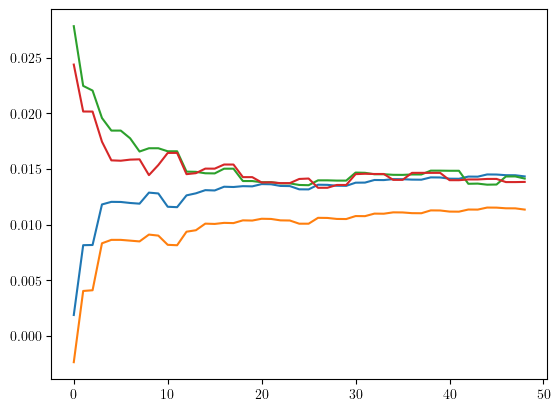

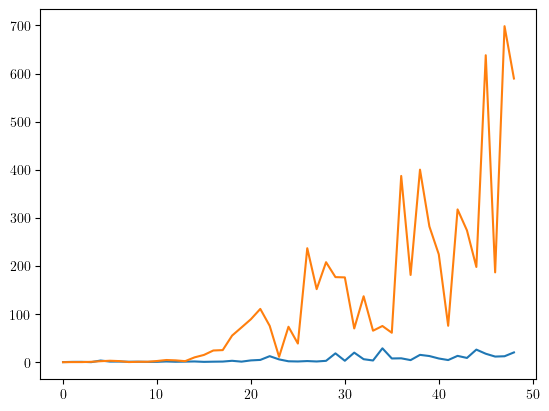

In [204]:
df = pd.read_csv("/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio/analysis/df_0.csv")
plt.plot(df["DRO_obj_values"])
plt.plot(df["SA_obj_values"])
plt.plot(df["SA_eval1"])
plt.plot(df["DRO_eval1"])
plt.show()
plt.plot(df["SA_time"])
plt.plot(df["DRO_time"])

In [103]:
df = pd.read_csv("/Users/irina.wang/Desktop/Princeton/Project2/mro_mpc/portfolio/analysis/df_0.csv")
plt.plot(df["obj_values"])
plt.plot(df["MRO_obj_values"])
plt.plot(df["O_eval0"])
plt.plot(df["MRO_eval0"])
plt.show()
plt.plot(df["online_time"])
plt.plot(df["MRO_time"])

KeyError: 'obj_values'

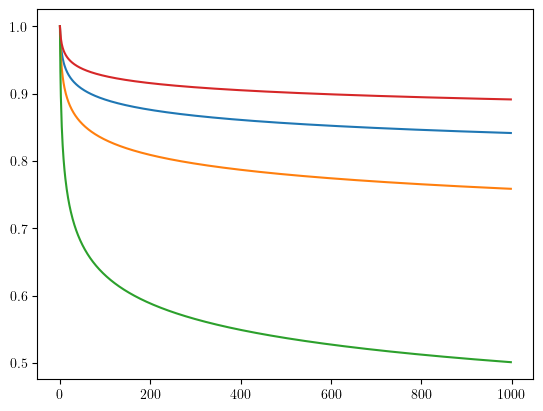

In [199]:
plt.plot([(1/(t**(1/(40)))) for t in range(1,1000)])
plt.plot([(1/(t**(1/(25)))) for t in range(1,1000)])
plt.plot([(1/(t**(1/(10)))) for t in range(1,1000)])
plt.plot([(1/(t**(1/(60)))) for t in range(1,1000)])

In [136]:
df, quantiles = setup_dfs(init = True)

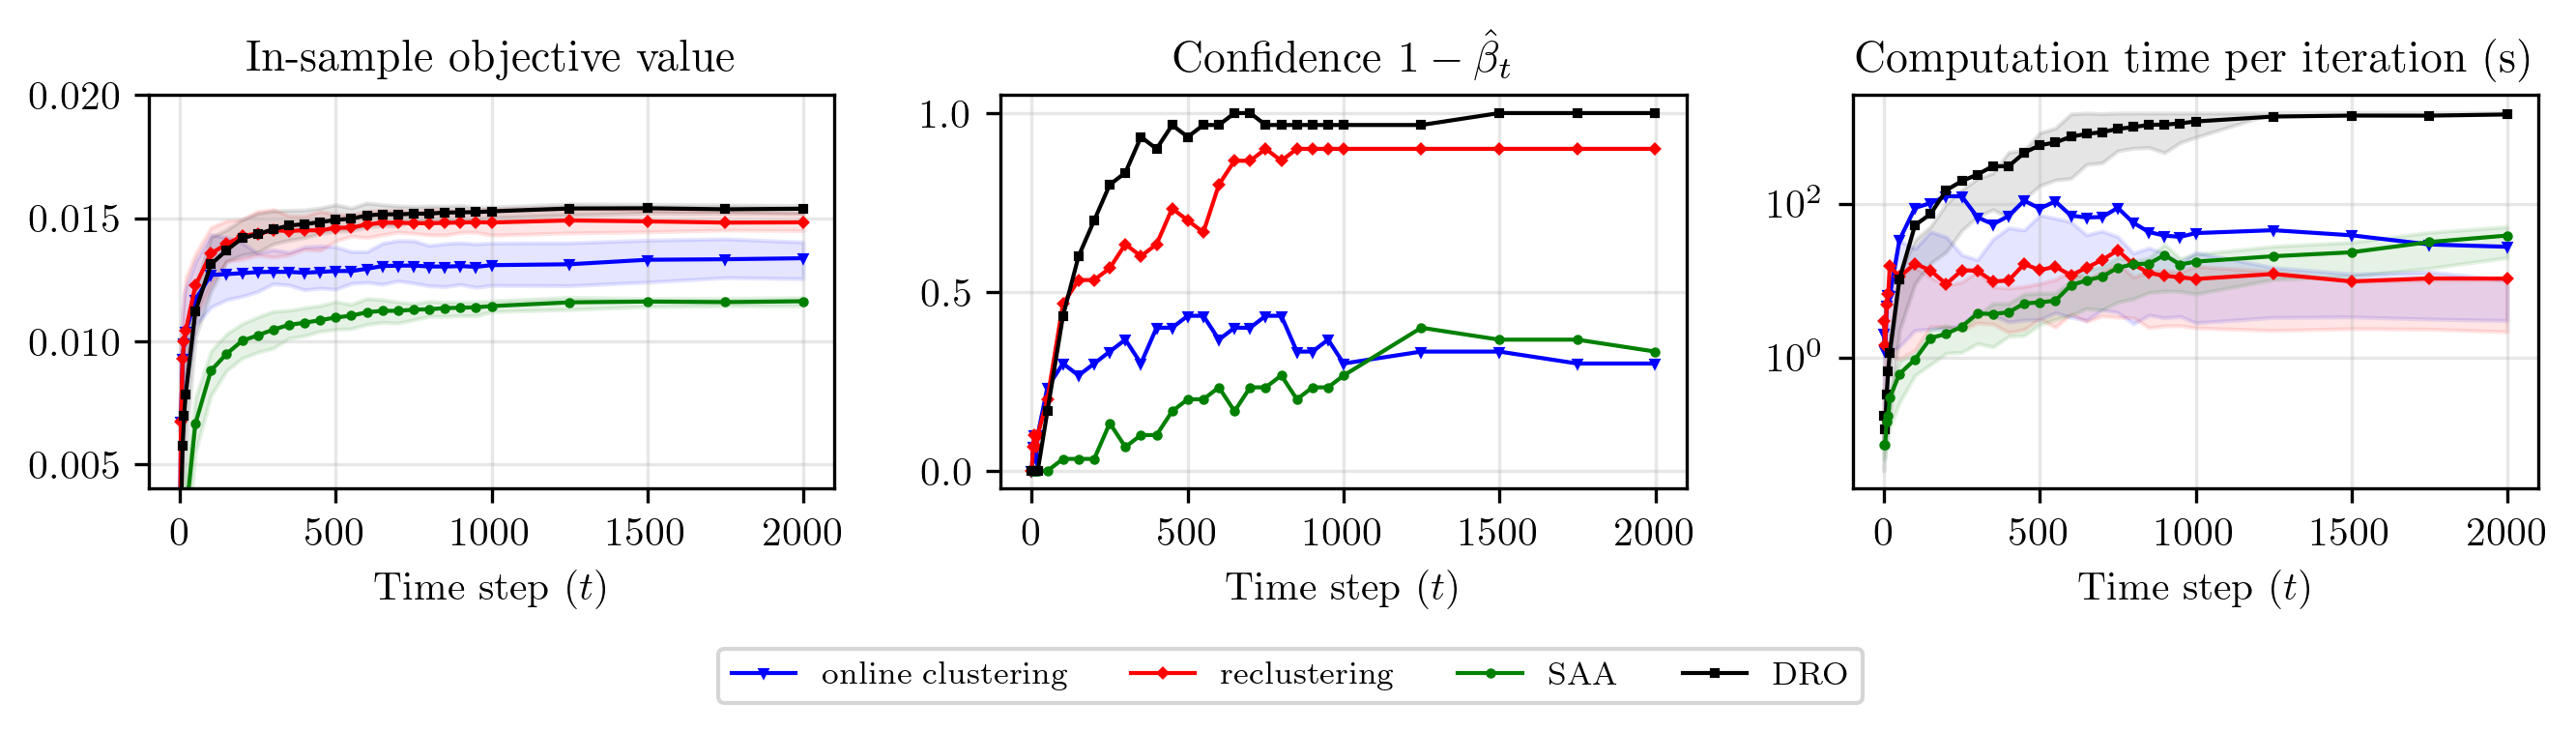

In [137]:
K = 15
# plot_eval_all(df,quantiles,df[0],quantiles[0],j=(5,5,3),K=5,q=(25,75),ylim=[0.004,0.02],legend = False,val2=2.3,end_ind=57)

plot_eval_all(df,quantiles,df[0],quantiles[0],j=(0,0,3),K=15,q=(25,75),ylim=[0.004,0.02],legend = True,val2=2.3, end_ind=58)

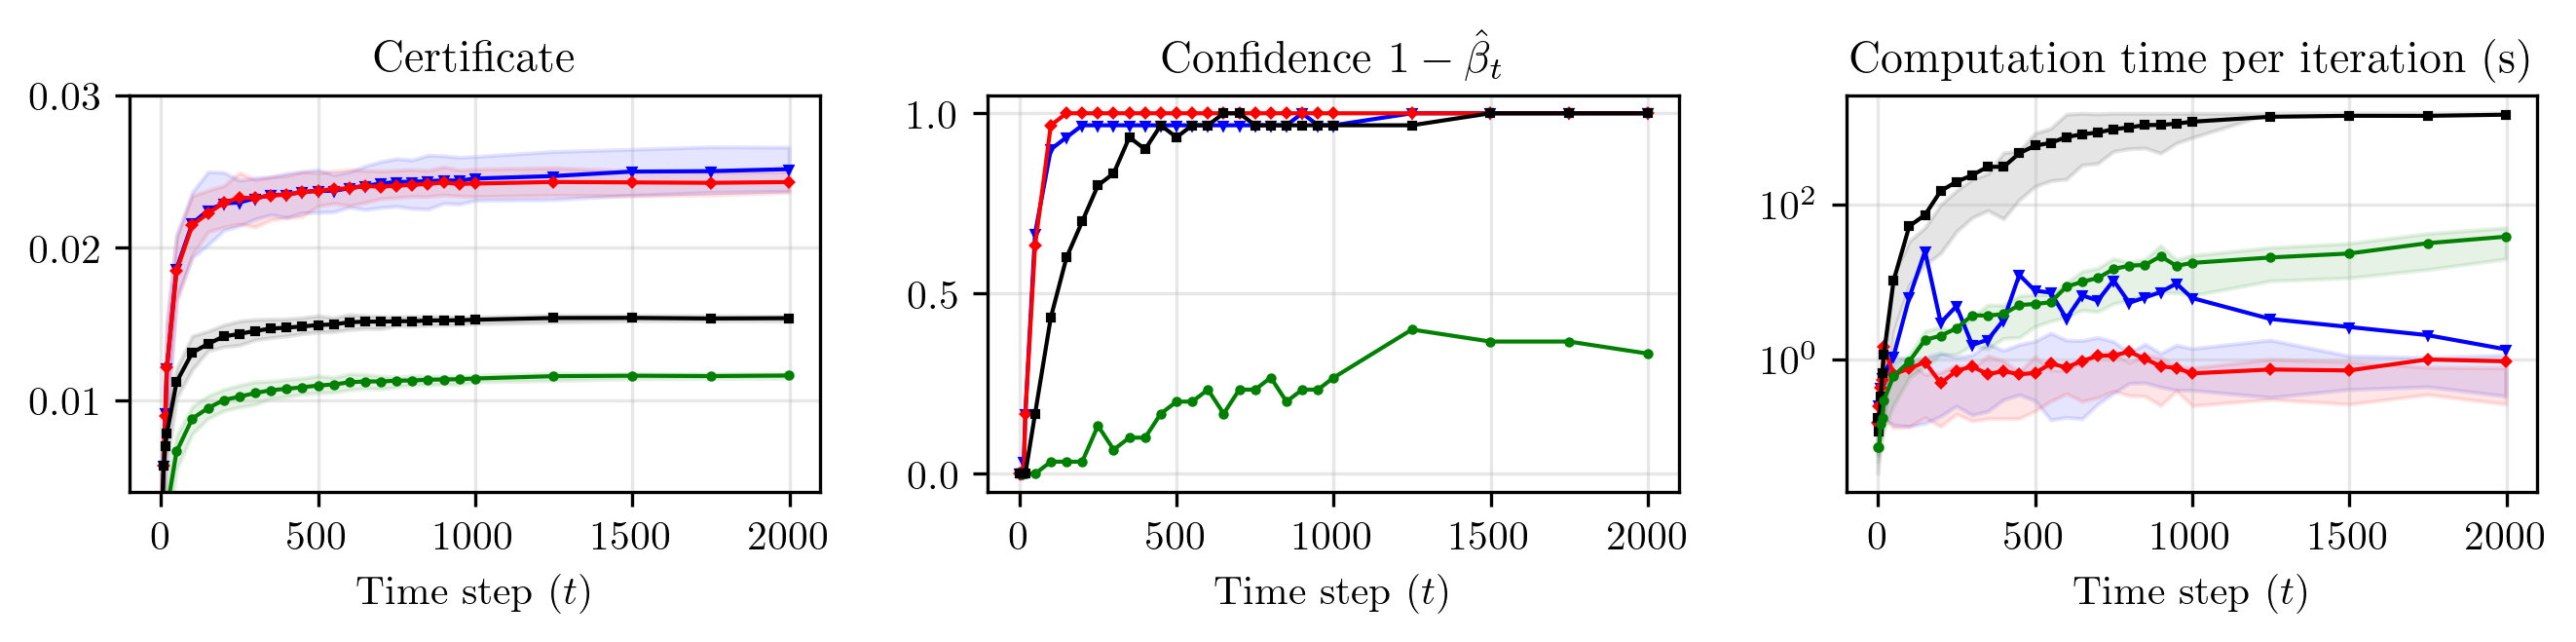

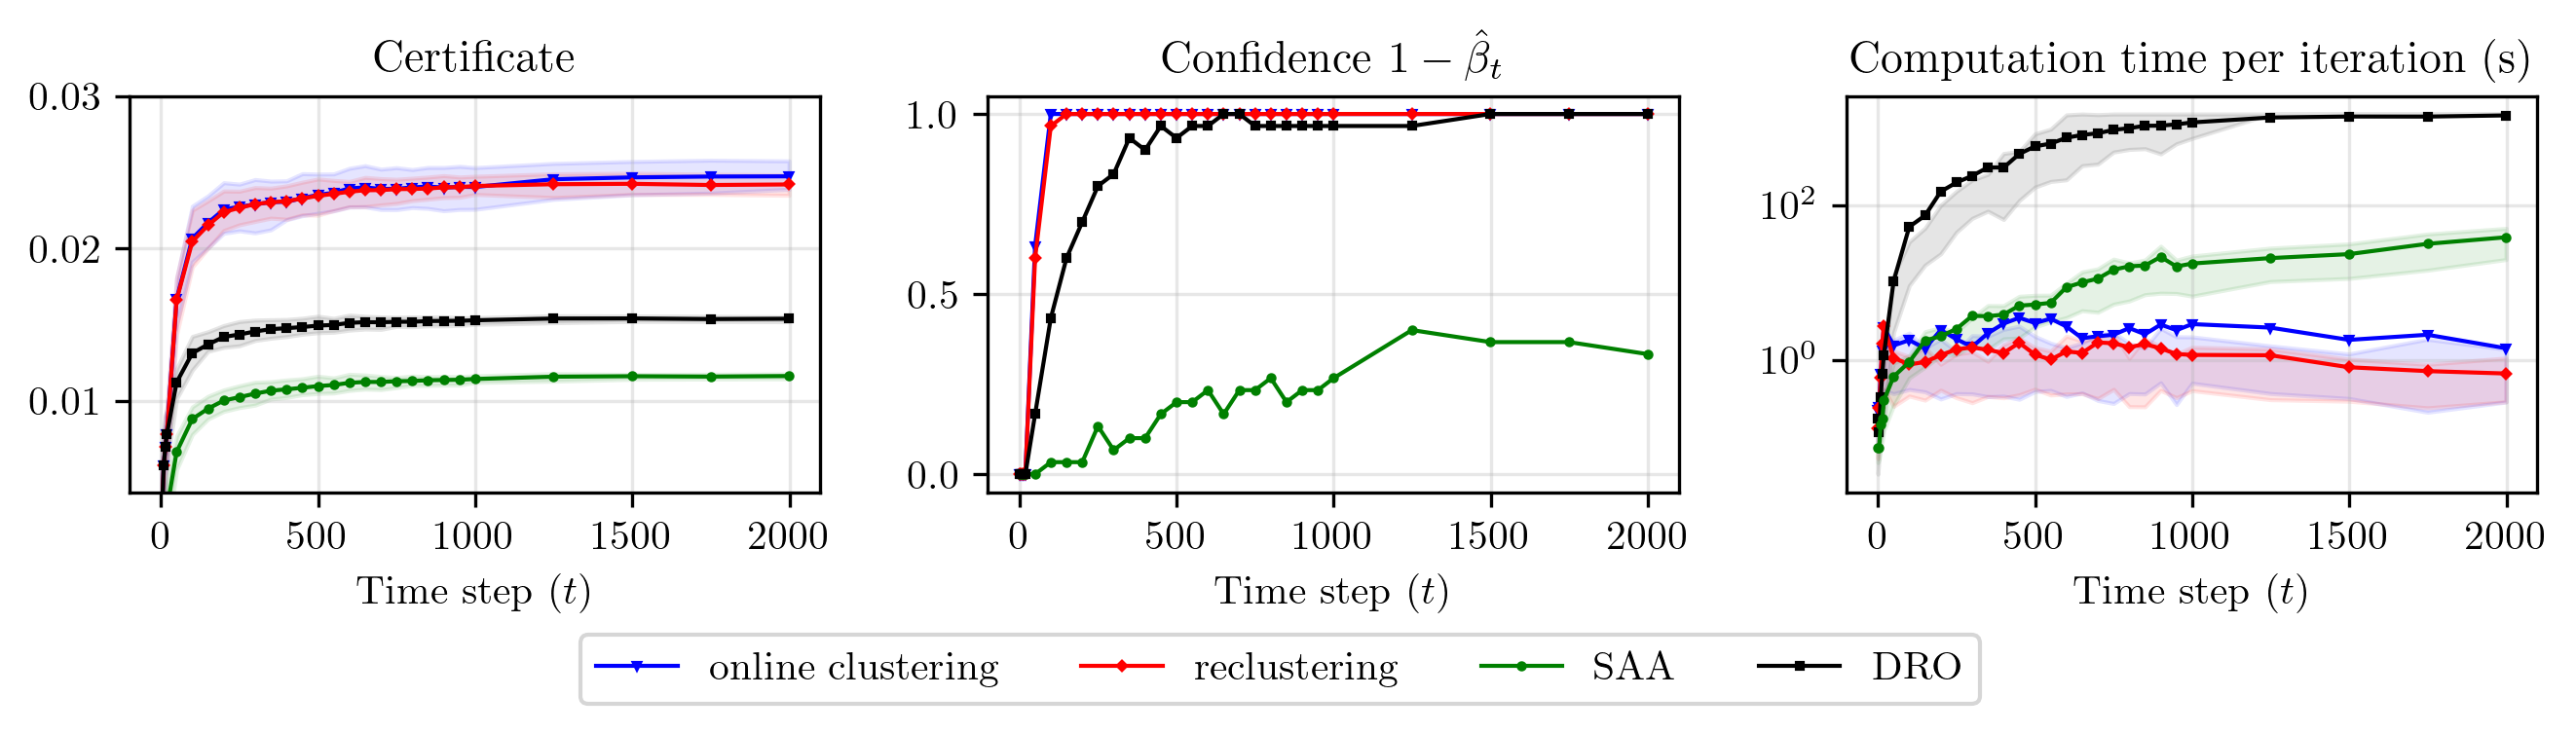

In [159]:
K = 15
# plot_certificates(df,quantiles,df[0],quantiles[0],j=(4,4,2),K=5,q=(25,75),ylim=[0.004,0.03],legend = False,val2=2.3,end_ind=57)

plot_certificates(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=15,q=(25,75),ylim=[0.004,0.03],legend = False,val2=2.3, end_ind=58)


plot_certificates(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=25,q=(25,75),ylim=[0.004,0.03],legend = True,val2=2.3, end_ind=58)

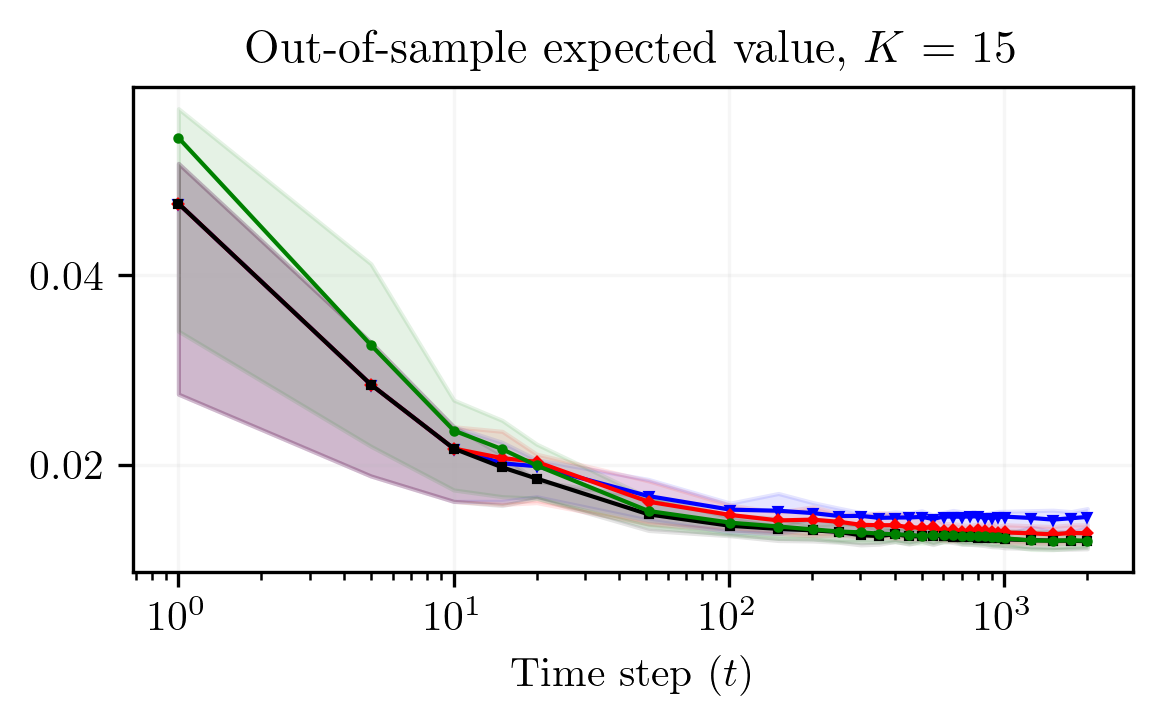

In [174]:
plot_eval(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=15,q=(25,75),end_ind=58,legend = False)

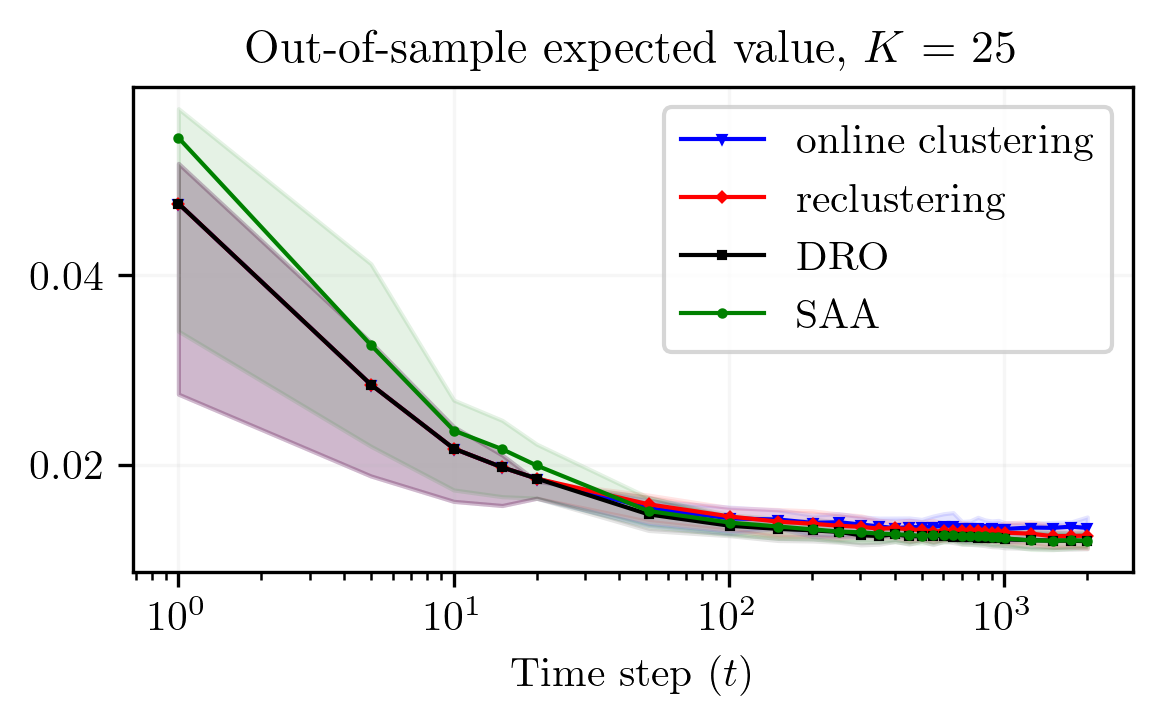

In [175]:
plot_eval(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=25,q=(25,75),end_ind=58)

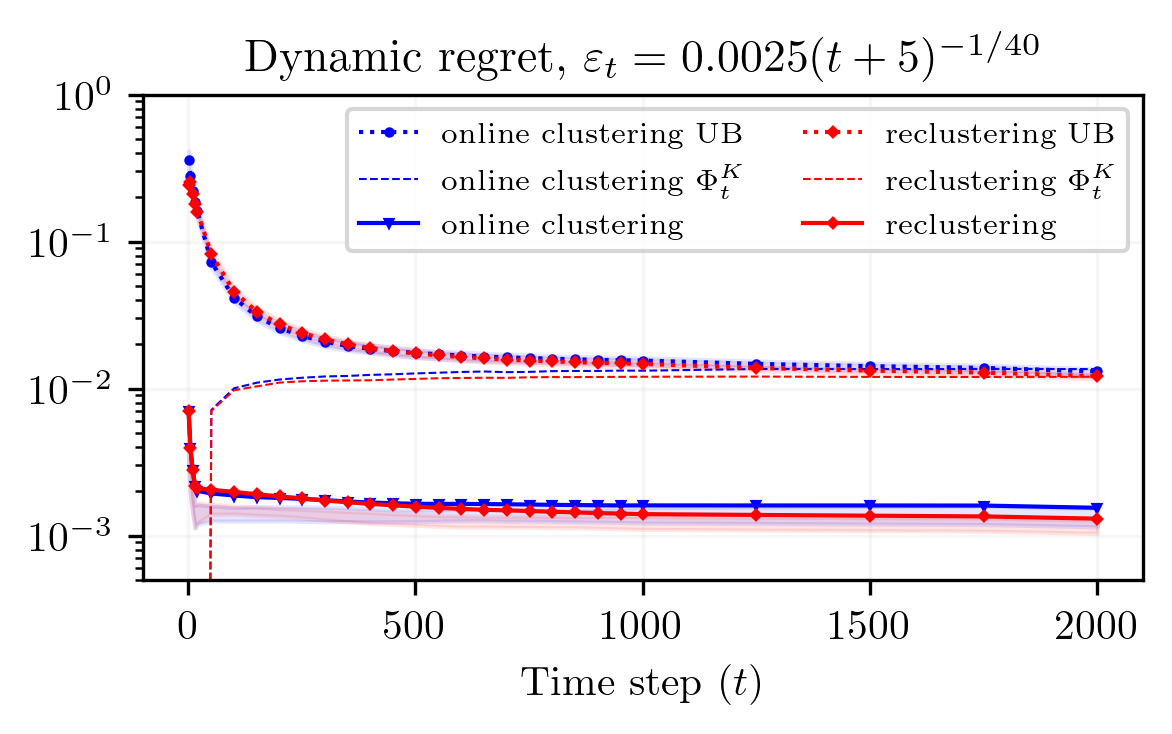

In [178]:
plot_regret(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=25,q=(25,75),end_ind = 58,ylim=[0.0005,1])

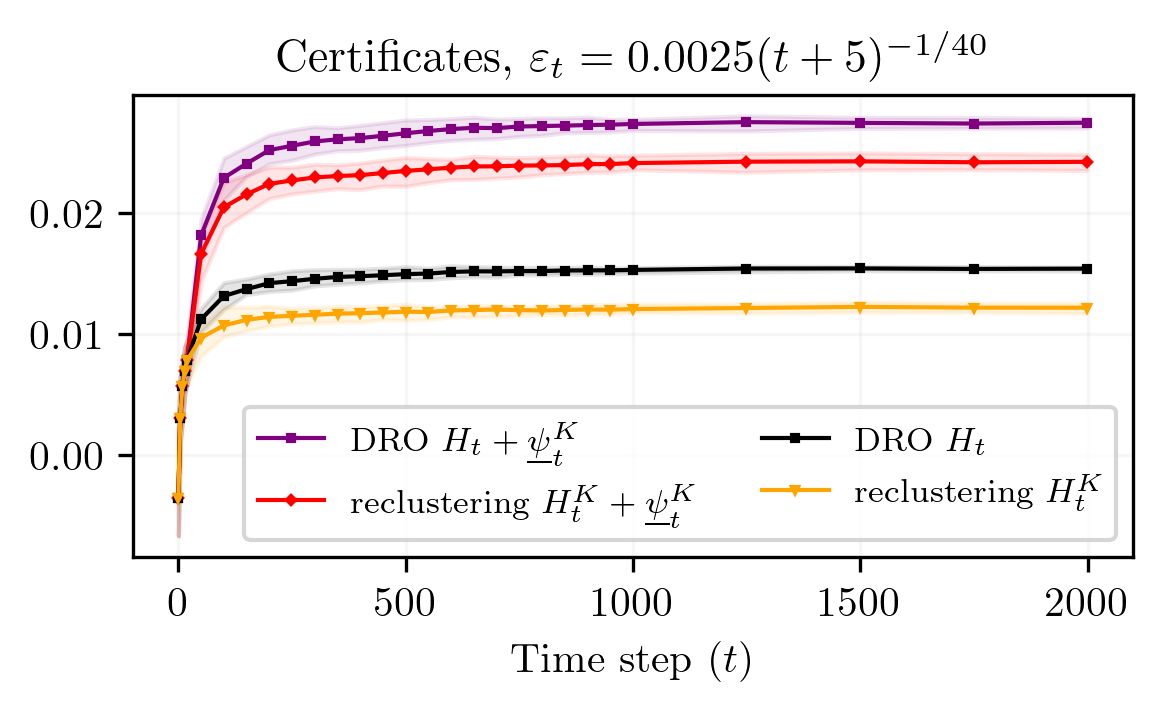

In [179]:
plot_bounds(df,quantiles,df[0],quantiles[0],j=(4,4,3),K=25,q=(25,75),end_ind = 58)